**No warnings**

In [1]:
!pip install shutup

In [2]:
import shutup; shutup.please()

**Kaggle API token for Google Colab**

**The following steps are only for running notebook in Google Colab Environment**

In [3]:
#!pip install kaggle

In [4]:
#!mkdir ~/.kaggle
#!cp /content/kaggle.json ~/.kaggle/kaggle.json
#!chmod 600 /root/.kaggle/kaggle.json

In [5]:
#!unzip *.zip

# Importing Required Libraries

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("darkgrid")

from sklearn import  metrics
from sklearn.metrics import accuracy_score,plot_confusion_matrix,precision_score,recall_score,f1_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve,roc_auc_score,plot_roc_curve

from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from lightgbm import LGBMClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier



from scipy import ndimage

from sklearn import tree

%matplotlib inline

**Checking our data**

In [7]:
train_df = pd.read_csv('../input/kepler-labelled-time-series-data/exoTrain.csv')
train_df.head()

,LABEL,FLUX.1,FLUX.2,FLUX.3,FLUX.4,FLUX.5,FLUX.6,FLUX.7,FLUX.8,FLUX.9,...,FLUX.3188,FLUX.3189,FLUX.3190,FLUX.3191,FLUX.3192,FLUX.3193,FLUX.3194,FLUX.3195,FLUX.3196,FLUX.3197
0,2,93.85,83.81,20.10,-26.98,-39.56,-124.71,-135.18,-96.27,-79.89,...,-78.07,-102.15,-102.15,25.13,48.57,92.54,39.32,61.42,5.08,-39.54
1,2,-38.88,-33.83,-58.54,-40.09,-79.31,-72.81,-86.55,-85.33,-83.97,...,-3.28,-32.21,-32.21,-24.89,-4.86,0.76,-11.70,6.46,16.00,19.93
2,2,532.64,535.92,513.73,496.92,456.45,466.00,464.50,486.39,436.56,...,-71.69,13.31,13.31,-29.89,-20.88,5.06,-11.80,-28.91,-70.02,-96.67
3,2,326.52,347.39,302.35,298.13,317.74,312.70,322.33,311.31,312.42,...,5.71,-3.73,-3.73,30.05,20.03,-12.67,-8.77,-17.31,-17.35,13.98
4,2,-1107.21,-1112.59,-1118.95,-1095.10,-1057.55,-1034.48,-998.34,-1022.71,-989.57,...,-594.37,-401.66,-401.66,-357.24,-443.76,-438.54,-399.71,-384.65,-411.79,-510.54


In [8]:
val_df = pd.read_csv('../input/kepler-labelled-time-series-data/exoTest.csv')
val_df

,LABEL,FLUX.1,FLUX.2,FLUX.3,FLUX.4,FLUX.5,FLUX.6,FLUX.7,FLUX.8,FLUX.9,...,FLUX.3188,FLUX.3189,FLUX.3190,FLUX.3191,FLUX.3192,FLUX.3193,FLUX.3194,FLUX.3195,FLUX.3196,FLUX.3197
0,2,119.88,100.21,86.46,48.68,46.12,39.39,18.57,6.98,6.63,...,14.52,19.29,14.44,-1.62,13.33,45.50,31.93,35.78,269.43,57.72
1,2,5736.59,5699.98,5717.16,5692.73,5663.83,5631.16,5626.39,5569.47,5550.44,...,-581.91,-984.09,-1230.89,-1600.45,-1824.53,-2061.17,-2265.98,-2366.19,-2294.86,-2034.72
2,2,844.48,817.49,770.07,675.01,605.52,499.45,440.77,362.95,207.27,...,17.82,-51.66,-48.29,-59.99,-82.10,-174.54,-95.23,-162.68,-36.79,30.63
3,2,-826.00,-827.31,-846.12,-836.03,-745.50,-784.69,-791.22,-746.50,-709.53,...,122.34,93.03,93.03,68.81,9.81,20.75,20.25,-120.81,-257.56,-215.41
4,2,-39.57,-15.88,-9.16,-6.37,-16.13,-24.05,-0.90,-45.20,-5.04,...,-37.87,-61.85,-27.15,-21.18,-33.76,-85.34,-81.46,-61.98,-69.34,-17.84
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
565,1,374.46,326.06,319.87,338.23,251.54,209.84,186.35,167.46,135.45,...,-123.55,-166.90,-222.44,-209.71,-180.16,-166.83,-235.66,-213.63,-205.99,-194.07
566,1,-0.36,4.96,6.25,4.20,8.26,-9.53,-10.10,-4.54,-11.55,...,-12.40,-5.99,-17.94,-11.96,-12.11,-13.68,-3.59,-5.32,-10.98,-11.24
567,1,-54.01,-44.13,-41.23,-42.82,-39.47,-24.88,-31.14,-24.71,-13.12,...,-0.73,-1.64,1.58,-4.82,-11.93,-17.14,-4.25,5.47,14.46,18.70
568,1,91.36,85.60,48.81,48.69,70.05,22.30,11.63,37.86,28.27,...,2.44,11.53,-16.42,-17.86,21.10,-10.25,-37.06,-8.43,-6.48,17.60


**Descriptive Statistics**

In [9]:
train_df.describe().T

,count,mean,std,min,25%,50%,75%,max
LABEL,5087.0,1.007273,0.084982,1.00,1.000,1.00,1.000,2.0
FLUX.1,5087.0,144.505445,21506.686590,-227856.26,-42.340,-0.71,48.255,1439240.5
FLUX.2,5087.0,128.577834,21797.167583,-315440.76,-39.520,-0.89,44.285,1453319.0
FLUX.3,5087.0,147.134789,21913.092010,-284001.76,-38.505,-0.74,42.325,1468429.0
FLUX.4,5087.0,156.151203,22233.659938,-234006.87,-35.050,-0.40,39.765,1495750.0
...,...,...,...,...,...,...,...,...
FLUX.3193,5087.0,655.303147,53399.785963,-502889.37,-24.405,3.50,30.855,3616292.0
FLUX.3194,5087.0,-494.784966,17844.469520,-775322.00,-26.760,-0.68,18.175,288607.5
FLUX.3195,5087.0,-544.594264,17722.339334,-732006.00,-24.065,0.36,18.770,215972.0
FLUX.3196,5087.0,-440.239100,16273.406292,-700992.00,-21.135,0.90,19.465,207590.0


In [10]:
val_df.describe().T

,count,mean,std,min,25%,50%,75%,max
LABEL,570.0,1.008772,0.093329,1.00,1.0000,1.000,1.0000,2.0
FLUX.1,570.0,515.411351,12592.950138,-59421.00,-22.2300,1.195,98.3175,290882.5
FLUX.2,570.0,738.046404,12622.940170,-14663.43,-22.9125,0.410,89.7100,290653.5
FLUX.3,570.0,532.603246,12545.065255,-56580.00,-22.9850,-1.125,89.8275,290554.0
FLUX.4,570.0,739.618088,12591.933126,-10817.59,-18.6625,-0.880,73.2575,290486.5
...,...,...,...,...,...,...,...,...
FLUX.3193,570.0,291.509561,9654.581767,-90595.00,-18.2725,7.150,35.8100,205924.0
FLUX.3194,570.0,256.656789,9362.719825,-86719.07,-24.0000,-4.385,17.7550,203193.0
FLUX.3195,570.0,121.810035,9487.642217,-86911.50,-27.3600,-4.995,11.7450,205050.0
FLUX.3196,570.0,224.806035,9483.948248,-87123.26,-36.8550,-5.135,12.2650,206884.5


**As we can see our dataset constists of many columns(continuous values) of flux** 

**It also has a label for every star as 1 or 2 with 2 being that the star has atleast one exoplanet in orbit**

# Data Visualization


**Histogram of Stars with Exoplanets**

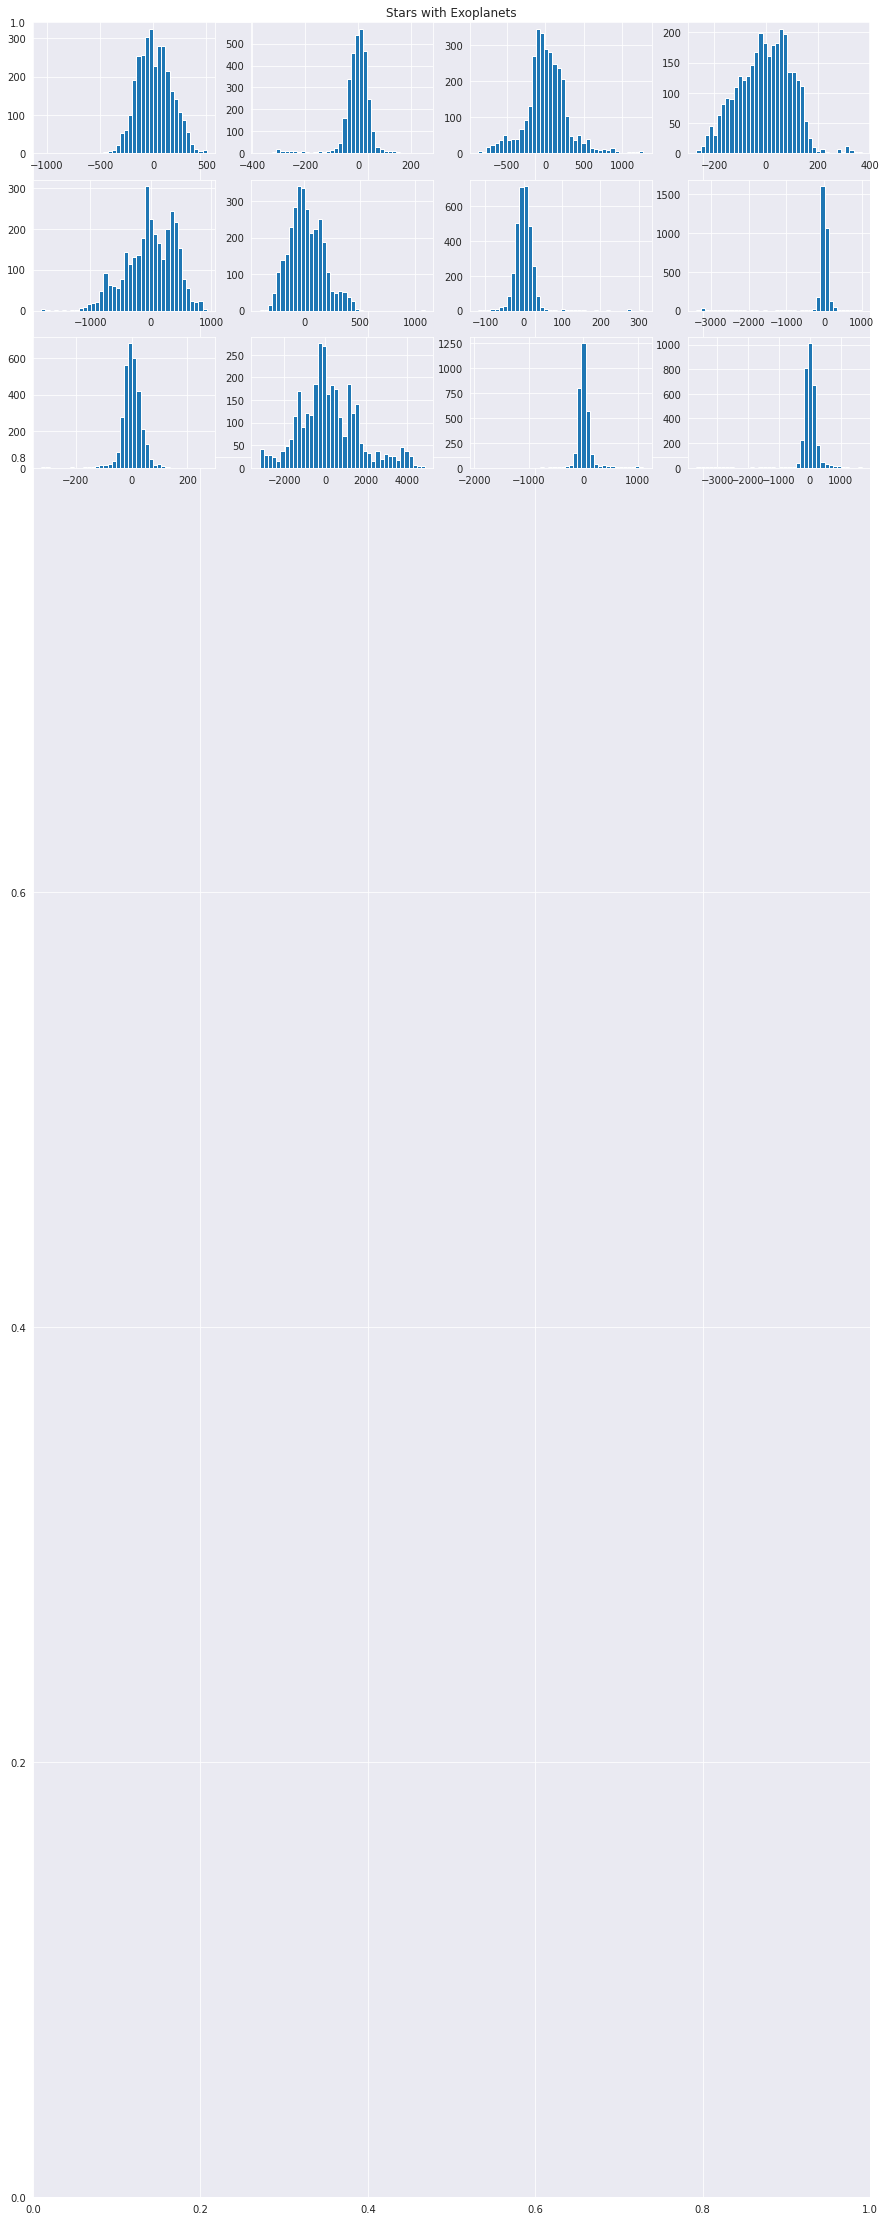

In [11]:
fig = plt.figure(figsize=(15,40))
plt.title('Stars with Exoplanets')
for i in range(12):
    ax = fig.add_subplot(14,4,i+1)
    train_df[train_df['LABEL']==2].iloc[i,1:].hist(bins=40)

**Stars without Exoplanets**

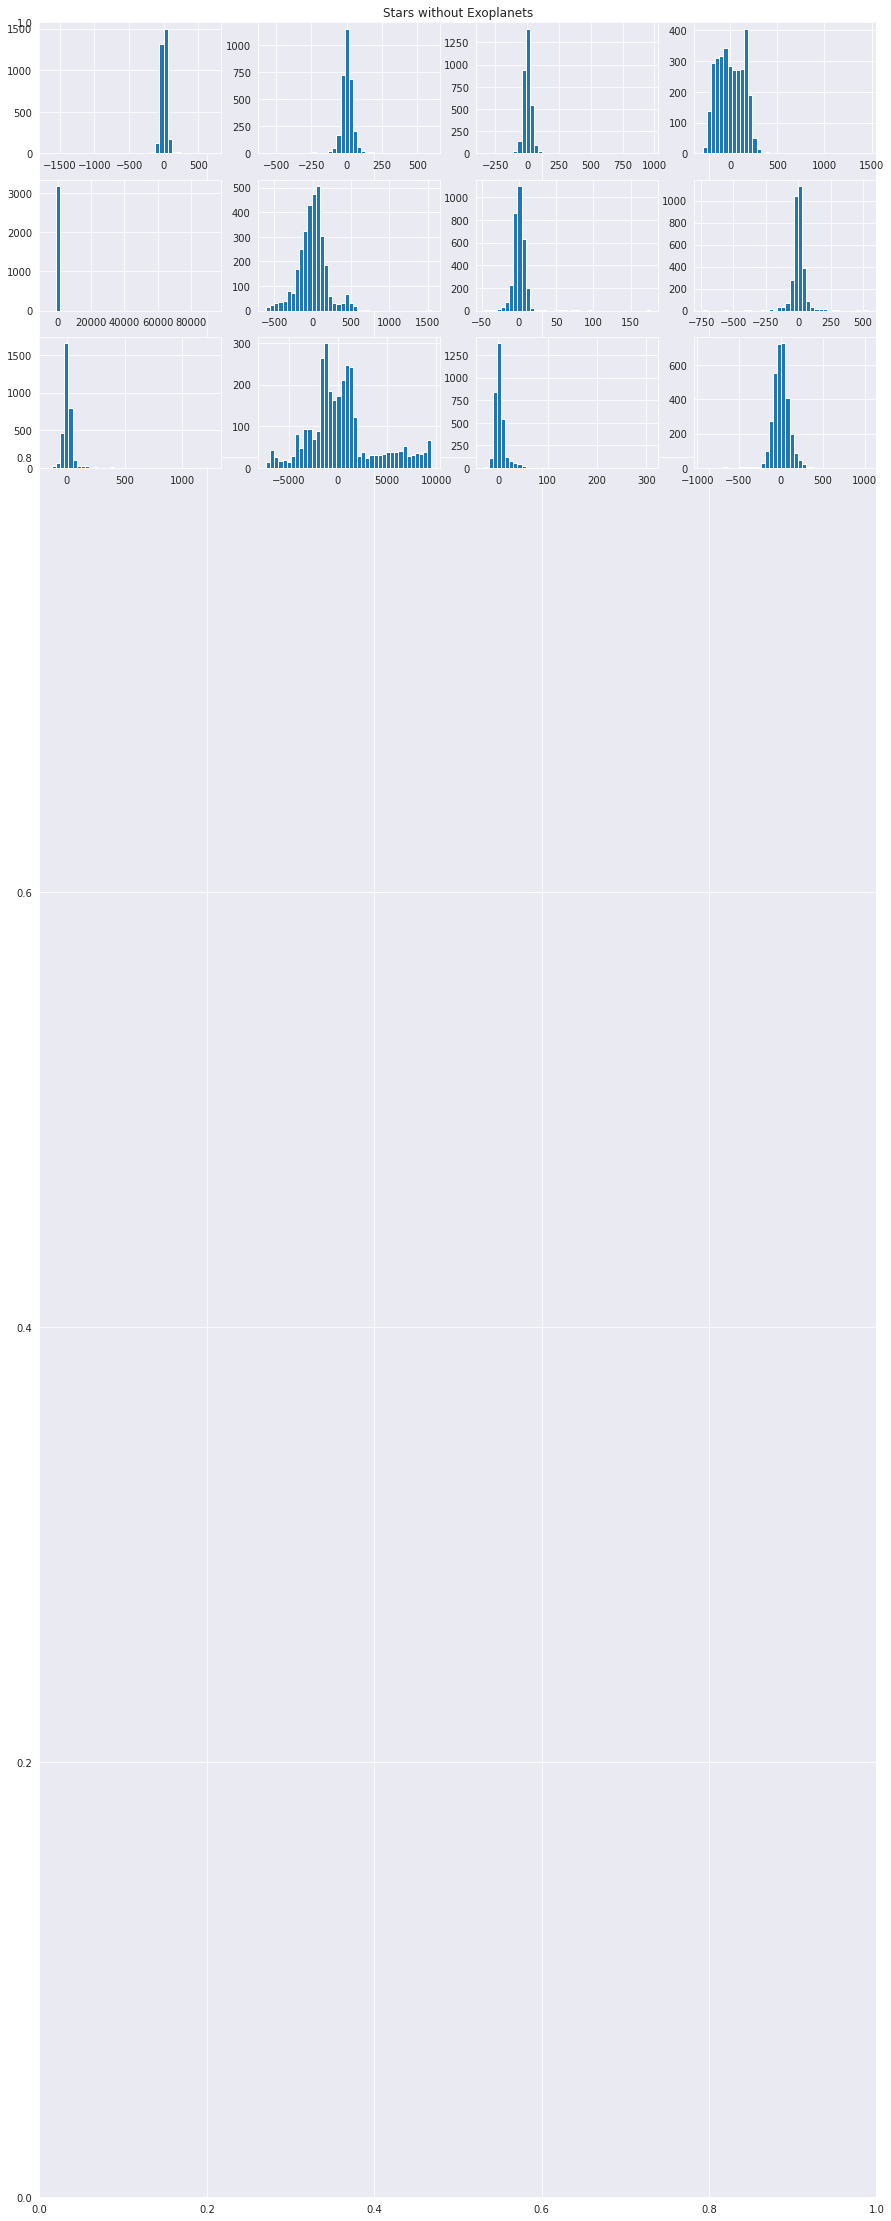

In [12]:
fig = plt.figure(figsize=(15,40))
plt.title('Stars without Exoplanets')
for i in range(12):
    ax = fig.add_subplot(14,4,i+1)
    train_df[train_df['LABEL']==1].iloc[i,1:].hist(bins=40)

**Visualisation of stars with Exoplanets**

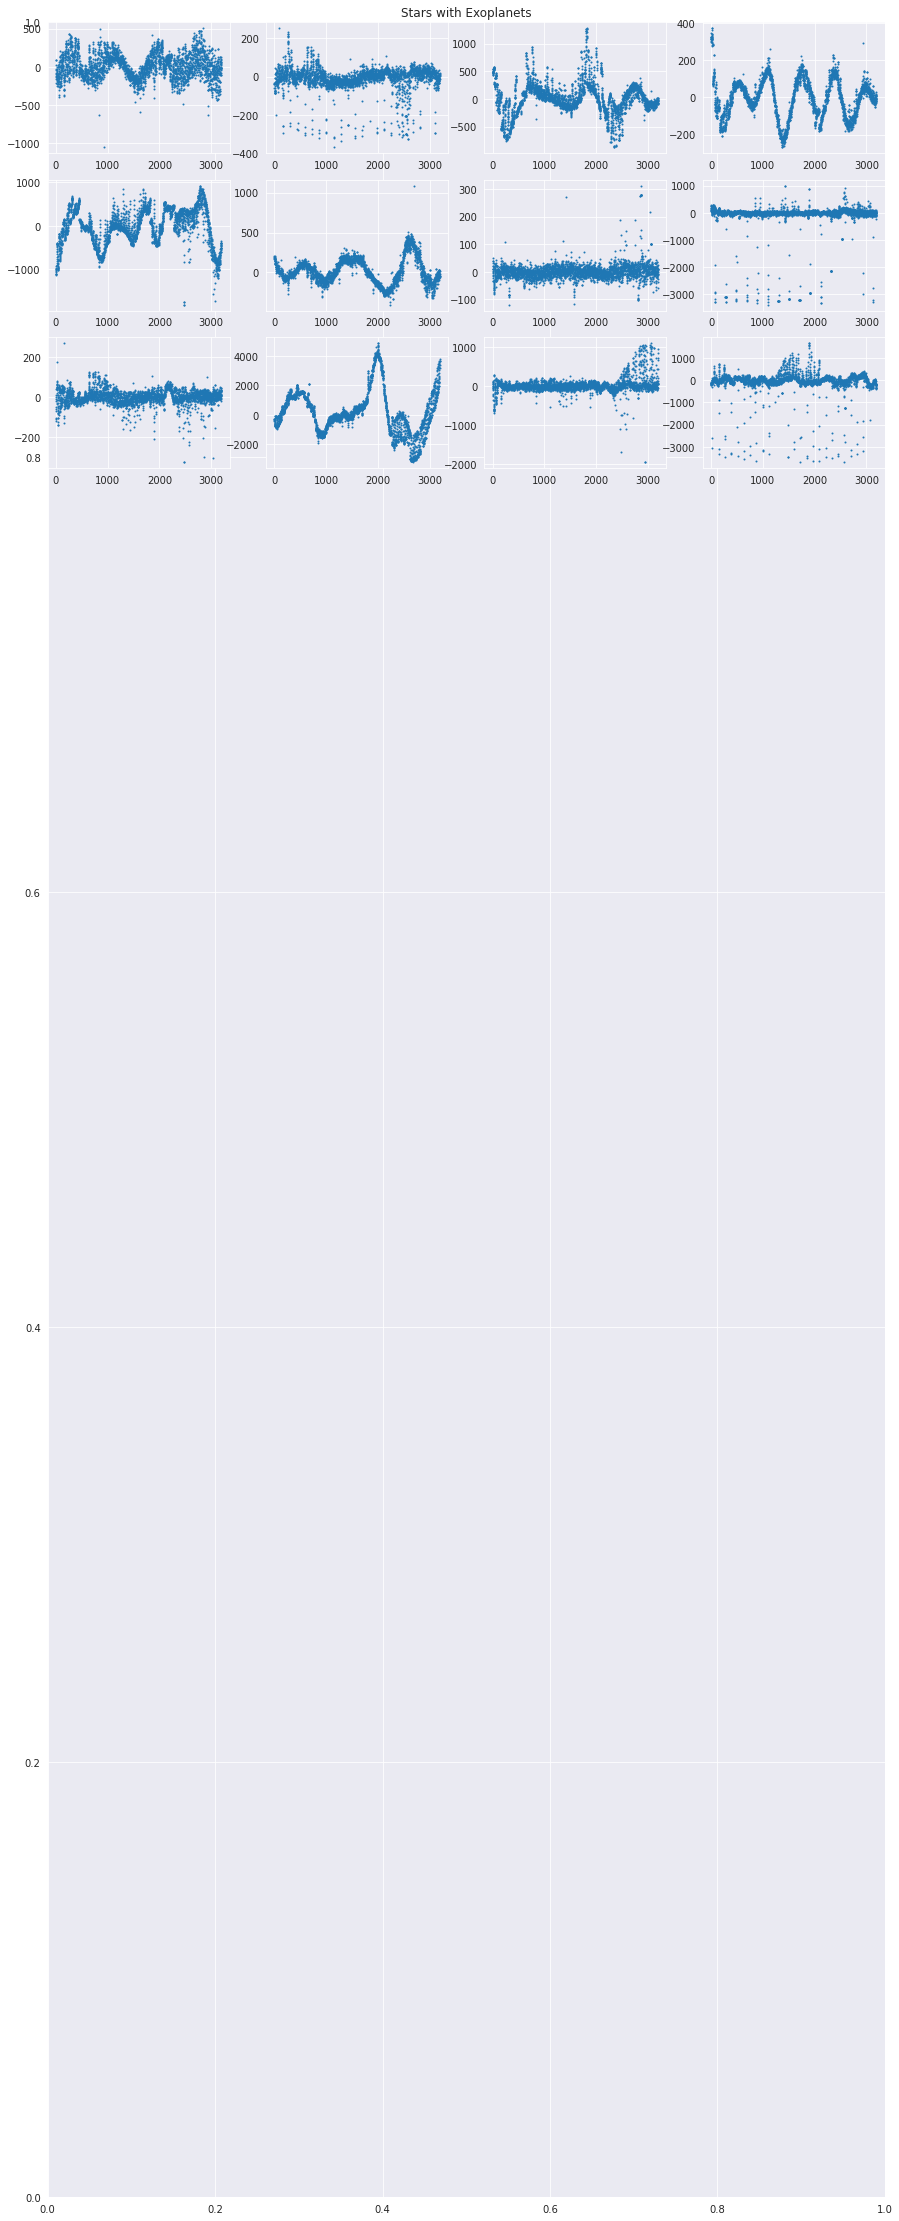

In [13]:
fig = plt.figure(figsize=(15,40))
plt.title('Stars with Exoplanets')
for i in range(12):
    ax = fig.add_subplot(14,4,i+1)
    ax.scatter(np.arange(3197),train_df[train_df['LABEL'] == 2].iloc[i,1:],s=1)

**Stars without Exoplanets**

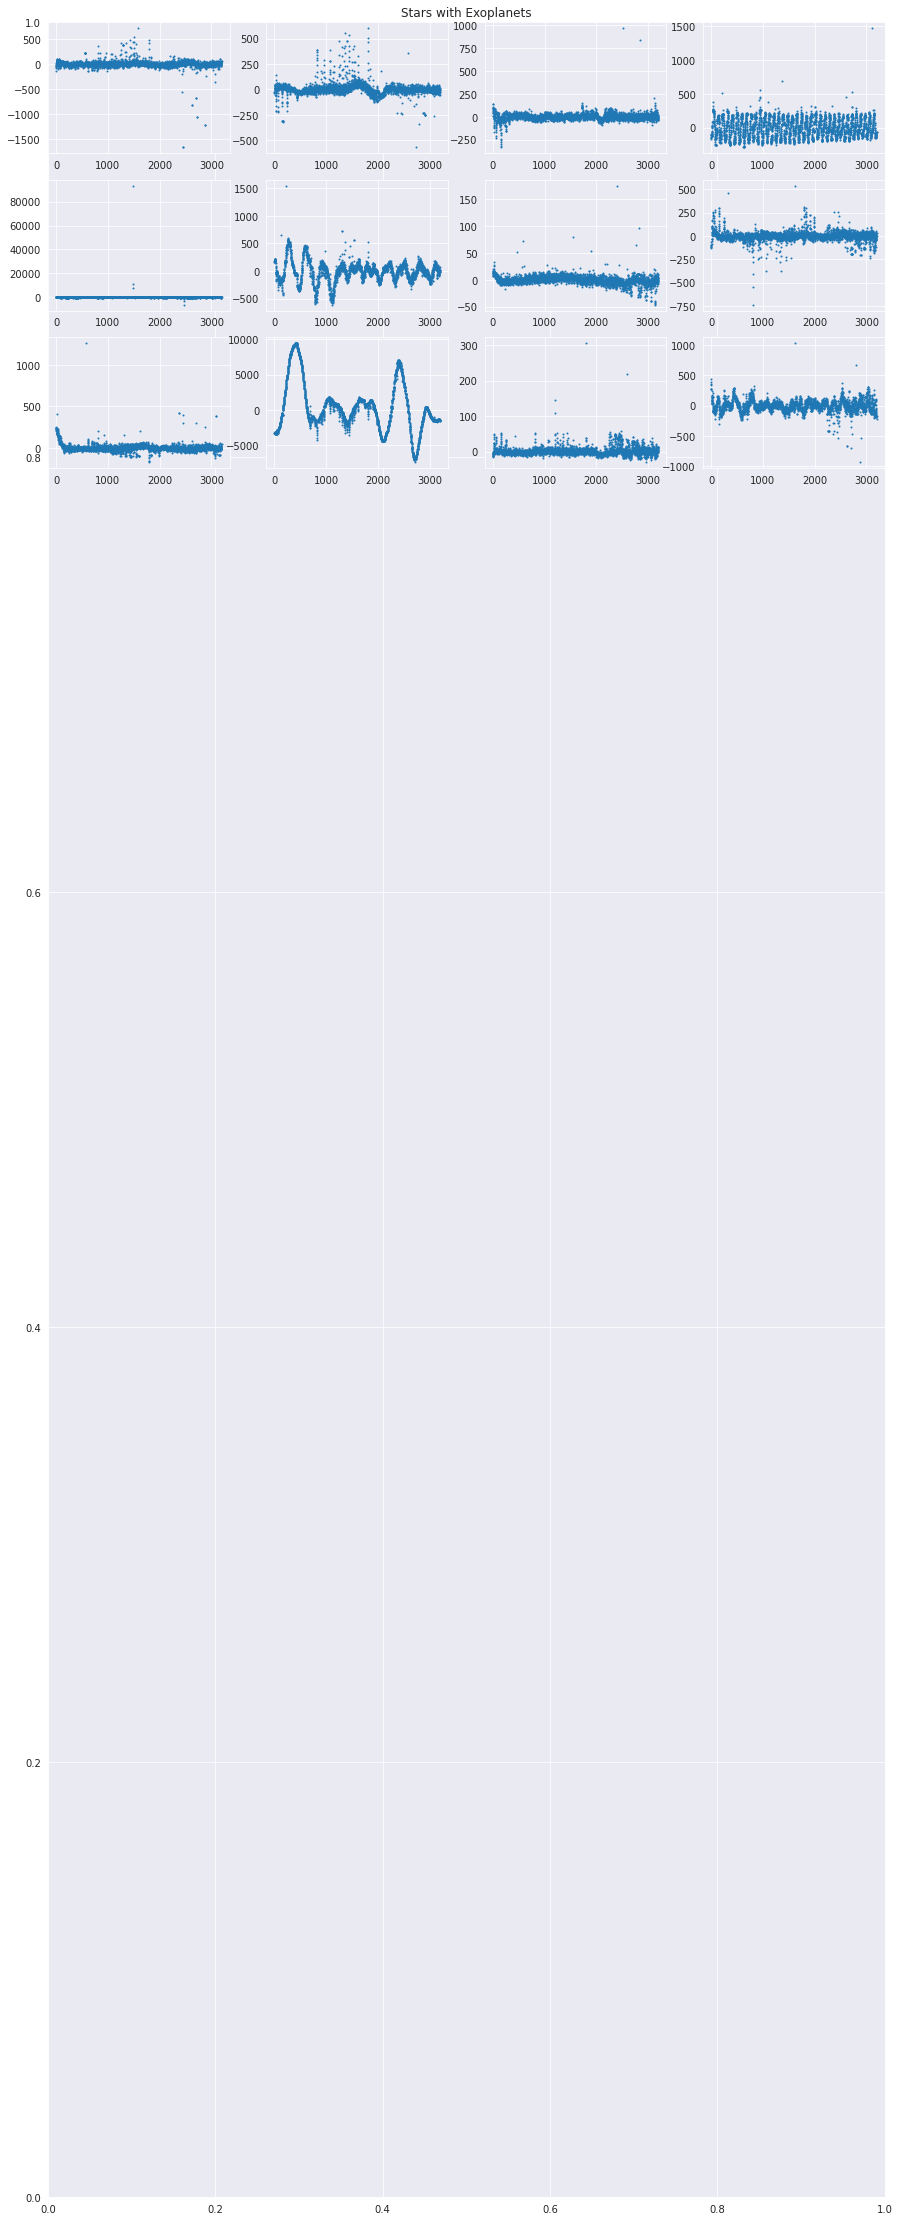

In [14]:
fig = plt.figure(figsize=(15,40))
plt.title('Stars with Exoplanets')
for i in range(12):
    ax = fig.add_subplot(14,4,i+1)
    ax.scatter(np.arange(3197),train_df[train_df['LABEL']==1].iloc[i,1:],s=1)

**Range of Minimum and Maximum Values**

Plotting the minimum and maximum flux values for the stars

In [15]:
minima = train_df.iloc[:,1:].min(axis=1)
maxima = train_df.iloc[:,1:].max(axis=1)

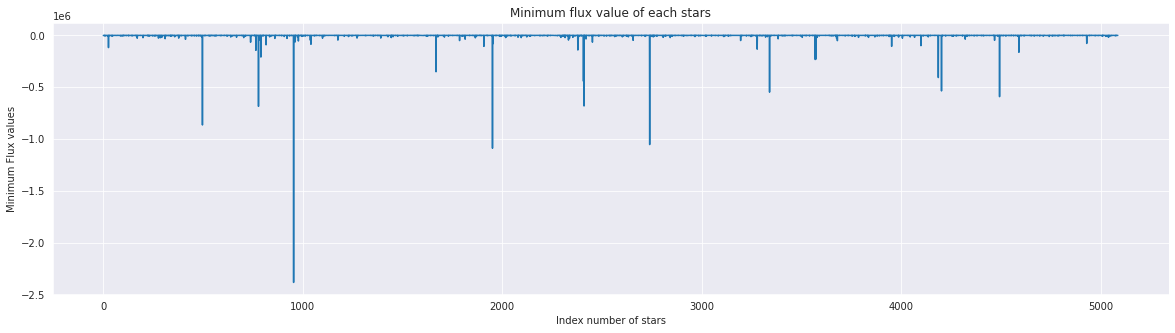

In [16]:
plt.figure(figsize=(20,5))
plt.title('Minimum flux value of each stars')
plt.xlabel('Index number of stars')
plt.ylabel('Minimum Flux values')
plt.plot(np.arange(len(minima)),minima)

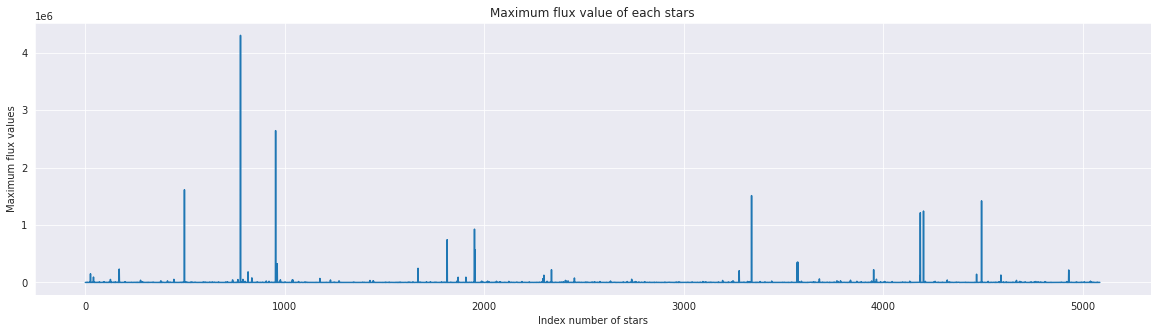

In [17]:
plt.figure(figsize=(20,5))
plt.title('Maximum flux value of each stars')
plt.xlabel('Index number of stars')
plt.ylabel('Maximum flux values')
plt.plot(np.arange(len(maxima)),maxima)

**Inferences -**

* Data is very imbalanced.
* Data consists of lots of outliers.
* Data contains a lot of noise.

**Creation of Training and Validation sets**

In [18]:
train_X = train_df.drop('LABEL',axis = 1)
val_X = val_df.drop('LABEL',axis =1)

In [19]:
print("Shape of Training X :",train_X.shape)
print("Shape of Validation X :",val_X.shape)

Shape of Training X : (5087, 3197)
Shape of Validation X : (570, 3197)


In [20]:
train_y = train_df['LABEL'].values
val_y = val_df['LABEL'].values

In [21]:
print("Shape of Training y :",train_y.shape)
print("Shape of Validation y :",val_y.shape)

Shape of Training y : (5087,)
Shape of Validation y : (570,)


# Model Building

**Approaching the Problem in the same way**

**Going from simple ML Models towards more complex ones**

**Naive Bayes Classifier**

Applying the Gaussian NB Classifier

In [22]:
nb = GaussianNB()
nb.fit(train_X,train_y)
print('Attempting to fit Bernouli Naive Bayes Classifier')

Attempting to fit Bernouli Naive Bayes Classifier


In [23]:
%%time
y_pred_val_nb = nb.predict(val_X)
print('Accuracy on Validation set :',accuracy_score(val_y, y_pred_val_nb))
print("\n")
print(classification_report(val_y, y_pred_val_nb))

Accuracy on Validation set : 0.02456140350877193


              precision    recall  f1-score   support

           1       1.00      0.02      0.03       565
           2       0.01      1.00      0.02         5

    accuracy                           0.02       570
   macro avg       0.50      0.51      0.02       570
weighted avg       0.99      0.02      0.03       570

CPU times: user 45.2 ms, sys: 5.92 ms, total: 51.1 ms
Wall time: 51.9 ms


Confusion Matrix: 


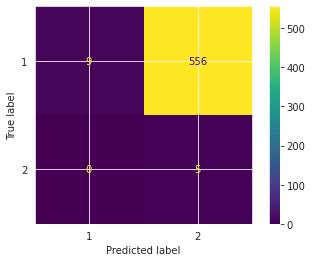

In [24]:
print('Confusion Matrix: \n',metrics.ConfusionMatrixDisplay.from_predictions(val_y, y_pred_val_nb))

Normalized Confusion Matrix:


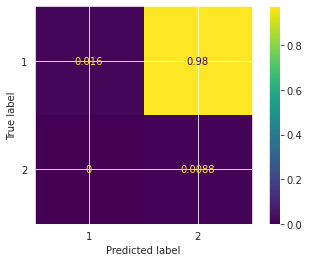

In [25]:
print('Normalized Confusion Matrix:\n',metrics.ConfusionMatrixDisplay.from_predictions(val_y, y_pred_val_nb,normalize='all'))

**Logistic Regression**

In [26]:
lr = LogisticRegression()
lr.fit(train_X,train_y)
print('Attempting to fit Logistic Regressor')

Attempting to fit Logistic Regressor


In [27]:
%%time
y_pred_val_lr = lr.predict(val_X)
print('Accuracy on Validation set :',accuracy_score(val_y, y_pred_val_lr))
print("\n")
print(classification_report(val_y, y_pred_val_lr))

Accuracy on Validation set : 0.5631578947368421


              precision    recall  f1-score   support

           1       0.99      0.56      0.72       565
           2       0.01      0.40      0.02         5

    accuracy                           0.56       570
   macro avg       0.50      0.48      0.37       570
weighted avg       0.98      0.56      0.71       570

CPU times: user 46.6 ms, sys: 103 ms, total: 150 ms
Wall time: 37.9 ms


Confusion Matrix: 


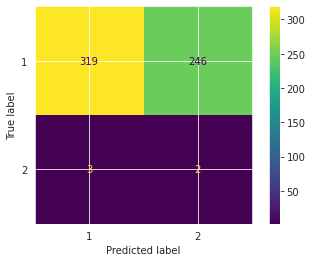

In [28]:
print('Confusion Matrix: \n',metrics.ConfusionMatrixDisplay.from_predictions(val_y, y_pred_val_lr))

Normalized Confusion Matrix:


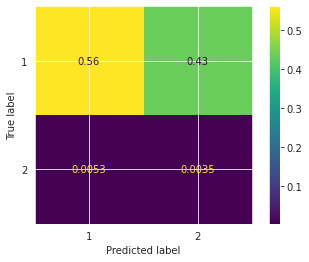

In [29]:
print('Normalized Confusion Matrix:\n',metrics.ConfusionMatrixDisplay.from_predictions(val_y, y_pred_val_lr,normalize='all'))

**Support Vector Classifier**

In [30]:
svm = LinearSVC()
svm.fit(train_X,train_y)
print('Attempting to fit Logistic Regressor')

Attempting to fit Logistic Regressor


In [31]:
%%time
y_pred_val_svm = svm.predict(val_X)
print('Accuracy on Validation set :',accuracy_score(val_y, y_pred_val_svm))
print("\n")
print(classification_report(val_y, y_pred_val_svm))

Accuracy on Validation set : 0.6333333333333333


              precision    recall  f1-score   support

           1       0.99      0.63      0.77       565
           2       0.01      0.60      0.03         5

    accuracy                           0.63       570
   macro avg       0.50      0.62      0.40       570
weighted avg       0.99      0.63      0.77       570

CPU times: user 35.8 ms, sys: 17 ms, total: 52.8 ms
Wall time: 31.1 ms


Confusion Matrix: 


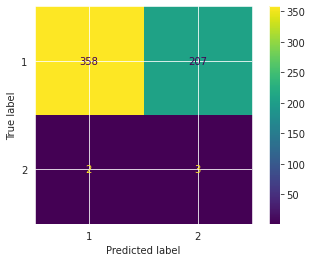

In [32]:
print('Confusion Matrix: \n',metrics.ConfusionMatrixDisplay.from_predictions(val_y, y_pred_val_svm))

Normalized Confusion Matrix:


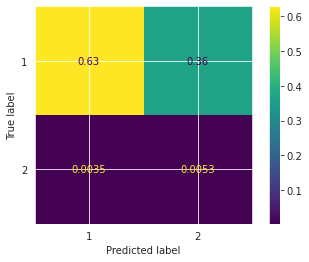

In [33]:
print('Normalized Confusion Matrix:\n',metrics.ConfusionMatrixDisplay.from_predictions(val_y, y_pred_val_svm,normalize='all'))

**KNN Classifier**

In [34]:
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(train_X,train_y)
print('Attempting to fit KNN Classifier')

Attempting to fit KNN Classifier


In [35]:
%%time
y_pred_val_knn = knn.predict(val_X)
print('Accuracy on Validation set :',accuracy_score(val_y, y_pred_val_knn))
print("\n")
print(classification_report(val_y, y_pred_val_knn))

Accuracy on Validation set : 0.9912280701754386


              precision    recall  f1-score   support

           1       0.99      1.00      1.00       565
           2       0.00      0.00      0.00         5

    accuracy                           0.99       570
   macro avg       0.50      0.50      0.50       570
weighted avg       0.98      0.99      0.99       570

CPU times: user 1.09 s, sys: 167 ms, total: 1.26 s
Wall time: 351 ms


Confusion Matrix: 


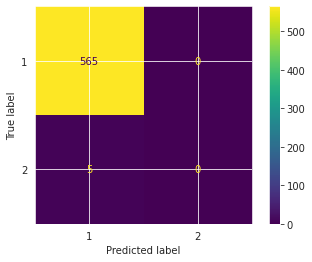

In [36]:
print('Confusion Matrix: \n',metrics.ConfusionMatrixDisplay.from_predictions(val_y, y_pred_val_knn))

Normalized Confusion Matrix:


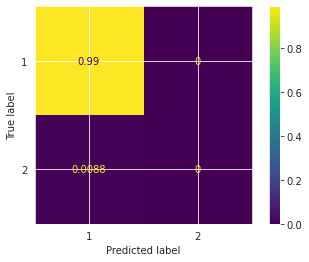

In [37]:
print('Normalized Confusion Matrix:\n',metrics.ConfusionMatrixDisplay.from_predictions(val_y, y_pred_val_knn,normalize='all'))

**Decision Tree Classifier**

In [38]:
dc = DecisionTreeClassifier(random_state = 0)
dc.fit(train_X,train_y)
print('Attempting to fit Decision Tree Classifier')

Attempting to fit Decision Tree Classifier


In [39]:
%%time
y_pred_val_dc = dc.predict(val_X)
print('Accuracy on Validation set :',accuracy_score(val_y, y_pred_val_dc))
print("\n")
print(classification_report(val_y, y_pred_val_dc))

Accuracy on Validation set : 0.9824561403508771


              precision    recall  f1-score   support

           1       0.99      0.99      0.99       565
           2       0.14      0.20      0.17         5

    accuracy                           0.98       570
   macro avg       0.57      0.59      0.58       570
weighted avg       0.99      0.98      0.98       570

CPU times: user 29.5 ms, sys: 3.81 ms, total: 33.3 ms
Wall time: 32.7 ms


Confusion Matrix: 


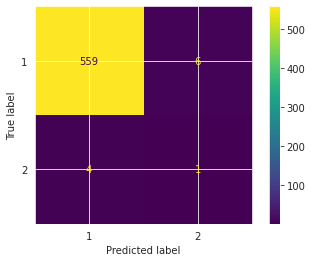

In [40]:
print('Confusion Matrix: \n',metrics.ConfusionMatrixDisplay.from_predictions(val_y, y_pred_val_dc))

Normalized Confusion Matrix:


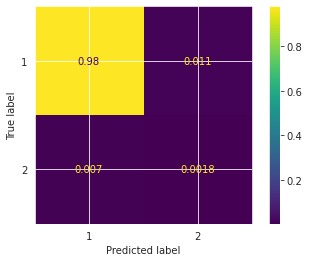

In [41]:
print('Normalized Confusion Matrix:\n',metrics.ConfusionMatrixDisplay.from_predictions(val_y, y_pred_val_dc,normalize='all'))

**Random Forest Classifier**

In [42]:
rf = RandomForestClassifier()
rf.fit(train_X,train_y)
print('Attempting to fit Random Forest Classifier')

Attempting to fit Random Forest Classifier


In [43]:
%%time
y_pred_val_rf = rf.predict(val_X)
print('Accuracy on Validation set :',accuracy_score(val_y, y_pred_val_rf))
print("\n")
print(classification_report(val_y, y_pred_val_rf))

Accuracy on Validation set : 0.9912280701754386


              precision    recall  f1-score   support

           1       0.99      1.00      1.00       565
           2       0.00      0.00      0.00         5

    accuracy                           0.99       570
   macro avg       0.50      0.50      0.50       570
weighted avg       0.98      0.99      0.99       570

CPU times: user 50.2 ms, sys: 2.09 ms, total: 52.3 ms
Wall time: 51.5 ms


Confusion Matrix: 


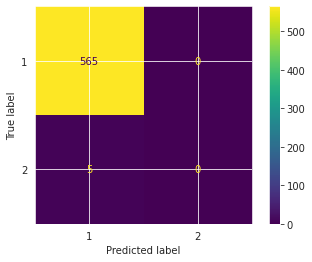

In [44]:
print('Confusion Matrix: \n',metrics.ConfusionMatrixDisplay.from_predictions(val_y, y_pred_val_rf))

Normalized Confusion Matrix:


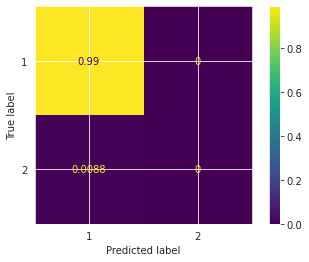

In [45]:
print('Normalized Confusion Matrix:\n',metrics.ConfusionMatrixDisplay.from_predictions(val_y, y_pred_val_rf,normalize='all'))

**MLP Classifier**

In [46]:
mlp = MLPClassifier(max_iter = 300)
mlp.fit(train_X,train_y)
print('Attempting to fit MLP Classifier')

Attempting to fit MLP Classifier


In [47]:
%%time
y_pred_val_mlp = mlp.predict(val_X)
print('Accuracy on Validation set :',accuracy_score(val_y, y_pred_val_mlp))
print("\n")
print(classification_report(val_y, y_pred_val_mlp))

Accuracy on Validation set : 0.9438596491228071


              precision    recall  f1-score   support

           1       0.99      0.95      0.97       565
           2       0.00      0.00      0.00         5

    accuracy                           0.94       570
   macro avg       0.50      0.48      0.49       570
weighted avg       0.98      0.94      0.96       570

CPU times: user 95.2 ms, sys: 119 ms, total: 214 ms
Wall time: 54 ms


Confusion Matrix: 


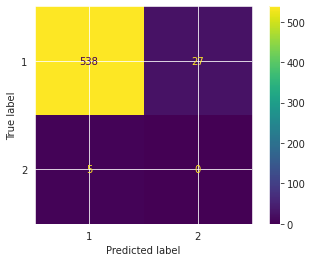

In [48]:
print('Confusion Matrix: \n',metrics.ConfusionMatrixDisplay.from_predictions(val_y, y_pred_val_mlp))

Normalized Confusion Matrix:


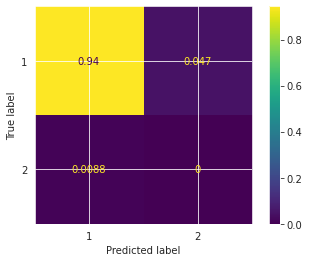

In [49]:
print('Normalized Confusion Matrix:\n',metrics.ConfusionMatrixDisplay.from_predictions(val_y, y_pred_val_mlp,normalize='all'))


**Gradient Boosting Classifier**

In [50]:
gbc = GradientBoostingClassifier()
gbc.fit(train_X,train_y)
print('Attempting to fit Gradient Boosting Classifier')

Attempting to fit Gradient Boosting Classifier


In [51]:
%%time
y_pred_val_gbc = gbc.predict(val_X)
print('Accuracy on Validation set :',accuracy_score(val_y, y_pred_val_gbc))
print("\n")
print(classification_report(val_y, y_pred_val_gbc))

Accuracy on Validation set : 0.9912280701754386


              precision    recall  f1-score   support

           1       0.99      1.00      1.00       565
           2       0.00      0.00      0.00         5

    accuracy                           0.99       570
   macro avg       0.50      0.50      0.50       570
weighted avg       0.98      0.99      0.99       570

CPU times: user 38.4 ms, sys: 4 ms, total: 42.4 ms
Wall time: 41.2 ms


Confusion Matrix: 


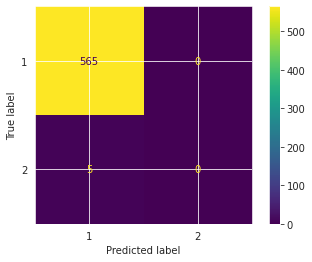

In [52]:
print('Confusion Matrix: \n',metrics.ConfusionMatrixDisplay.from_predictions(val_y, y_pred_val_gbc))

Normalized Confusion Matrix:


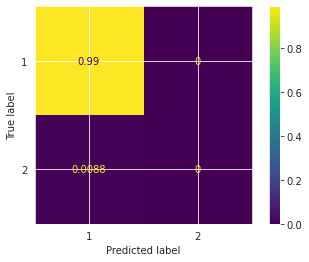

In [53]:
print('Normalized Confusion Matrix:\n',metrics.ConfusionMatrixDisplay.from_predictions(val_y, y_pred_val_gbc,normalize='all'))

**Light GBM Classifier**

In [54]:
lgbm = LGBMClassifier()
lgbm.fit(train_X,train_y)
print('Attempting to fit Light GBM Classifier')

Attempting to fit Light GBM Classifier


In [55]:
%%time
y_pred_val_lgbm = lgbm.predict(val_X)
print('Accuracy on Validation set :',accuracy_score(val_y, y_pred_val_lgbm))
print("\n")
print(classification_report(val_y, y_pred_val_lgbm))

Accuracy on Validation set : 0.9912280701754386


              precision    recall  f1-score   support

           1       0.99      1.00      1.00       565
           2       0.00      0.00      0.00         5

    accuracy                           0.99       570
   macro avg       0.50      0.50      0.50       570
weighted avg       0.98      0.99      0.99       570

CPU times: user 62.5 ms, sys: 6.06 ms, total: 68.6 ms
Wall time: 35.3 ms


Confusion Matrix: 


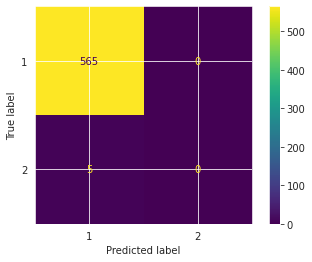

In [56]:
print('Confusion Matrix: \n',metrics.ConfusionMatrixDisplay.from_predictions(val_y, y_pred_val_lgbm))

Normalized Confusion Matrix:


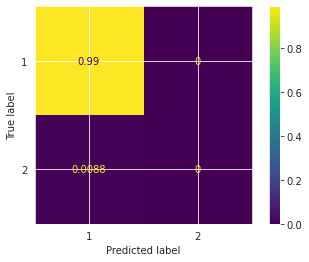

In [57]:
print('Normalized Confusion Matrix:\n',metrics.ConfusionMatrixDisplay.from_predictions(val_y, y_pred_val_lgbm,normalize='all'))

**Accuracy of all Models on Validation Set**

In [58]:
print('Accuracy of Naive Bayes on Validation set :',accuracy_score(val_y, y_pred_val_nb))
print('\nAccuracy of Logistic Regression on Validation set :',accuracy_score(val_y, y_pred_val_lr))
print('\nAccuracy of KNN Classifier on Validation set :',accuracy_score(val_y, y_pred_val_knn))
print('\nAccuracy of Support Vector on Validation set :',accuracy_score(val_y, y_pred_val_svm))
print('\nAccuracy of Decision Tree on Validation set :',accuracy_score(val_y, y_pred_val_dc))
print('\nAccuracy of Random Forest on Validation set :',accuracy_score(val_y, y_pred_val_rf))
print('\nAccuracy of MLP Classifier on Validation set :',accuracy_score(val_y, y_pred_val_mlp))
print('\nAccuracy of Gradient Boosting Classifier on Validation set :',accuracy_score(val_y, y_pred_val_gbc))
print('\nAccuracy Light GBM Classifier on Validation set :',accuracy_score(val_y, y_pred_val_lgbm))

Accuracy of Naive Bayes on Validation set : 0.02456140350877193

Accuracy of Logistic Regression on Validation set : 0.5631578947368421

Accuracy of KNN Classifier on Validation set : 0.9912280701754386

Accuracy of Support Vector on Validation set : 0.6333333333333333

Accuracy of Decision Tree on Validation set : 0.9824561403508771

Accuracy of Random Forest on Validation set : 0.9912280701754386

Accuracy of MLP Classifier on Validation set : 0.9438596491228071

Accuracy of Gradient Boosting Classifier on Validation set : 0.9912280701754386

Accuracy Light GBM Classifier on Validation set : 0.9912280701754386


**As we can see our top 3 Models are -**

1. MLP Classifier

2. Gradient Boosting Classifier

3. Light GBM Classifier

**Future Scope -**

* Applying Principal Component Analysis for selecting most important flux components.
* Applying Synthetic Minority Oversampling Technique (SMOTE) for imbalanced class treatment.
* Trying Advanced Neural Network Models.